In [1]:
%matplotlib nbagg

# import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

try:
    from sklearn.datasets import load_wine
    vins = load_wine()
    Data = pd.DataFrame(vins['data'],columns=vins['feature_names'])
    Data['class'] = vins['target']
except:
    Data = pd.read_csv('vins.csv',sep=';')


Le jeu de donnée est le résulat d'une analyse chimique de vins produit par 3 cultivateurs. Chaque ligne représente un vin testé où la variable **class** donne numéro du cultivateur qui la produit et les autres variables donnent le résultat de l'analyse chimique de ce vin.


(1). Importez les données sous forme d'un dataframe. Familiarisez-vous avec le tableau des données : Vérifiez la taille du tableau, regardez le type des différentes variables etc.

In [3]:
Data.shape

(178, 14)

In [4]:
Data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int64
dtype: object

In [5]:
Data.index

RangeIndex(start=0, stop=178, step=1)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.5 KB


In [7]:
Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


 ##### Distribution marginale
 ---

(2). Calculez les statistiques d'ordre de la variable **flavanoids**. 

In [8]:
Data.sort_values(by='flavanoids')['flavanoids']
flavanoids_serie = Data['flavanoids']
pd.DataFrame(np.percentile(flavanoids_serie, q=range(1,100+1)), index=range(1,100+1), columns=['percentile'])
# flavanoids_serie.count()==flavanoids_serie.size


,percentile
1,0.4700
2,0.4854
3,0.5000
4,0.5108
5,0.5455
6,0.5662
7,0.5800
8,0.5832
9,0.6000
10,0.6070


(3). En déduire les quartiles de cette variable. Quelle statistique de dispersion pouvez-vous calculer à partir de vos résultats précédents ? Calculez cette statistique.

Voici les quartiles:

In [9]:
q25 = np.percentile(flavanoids_serie,25)
Math('q_{{25}}={}'.format(q25))

<IPython.core.display.Math object>

In [10]:
q75 = np.percentile(flavanoids_serie,75)
Math('q_{{75}}={}'.format(q75))

<IPython.core.display.Math object>

Des quartiles, on peut déduire l'écart interquartiles:

In [11]:
eiq2575=q75-q25
Math('\Delta=q_{{75}}-q_{{25}}={}'.format(eiq2575))

<IPython.core.display.Math object>

(4). Quelle représentation graphique vous permettrait de répondre à la question 3 ? Affichez ce graphique.

La représentation utile ici est le **boxplot**.

<IPython.core.display.Javascript object>


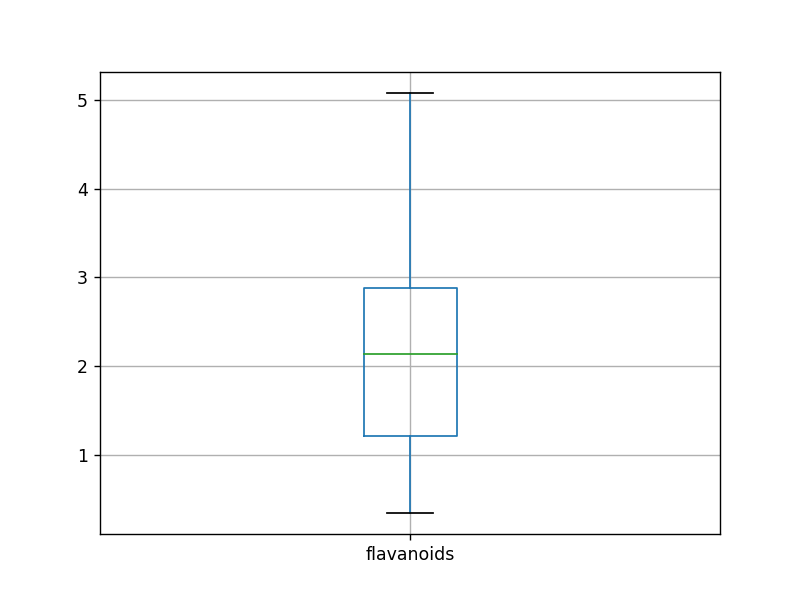

In [12]:
pd.DataFrame(flavanoids_serie).boxplot()

(5). Calculez la distribution (les valeurs et fréquences) de la variable **flavanoids**. Définissez une fonction qui prends en paramètres un entier r, des valeurs et des fréquences et qui renvoie le moment centré d'ordre r. Utilisez cette fonction pour calculer la variance de la variable **flavanoids** à partir de sa distribution.

Distribution des valeurs:

In [13]:
flavanoids_distrib = flavanoids_serie.value_counts().sort_index()
flavanoids_distrib.name = 'distribution'
pd.DataFrame(flavanoids_distrib)

,distribution
0.34,1
0.47,2
0.48,1
0.49,1
0.50,2
0.51,1
0.52,1
0.55,1
0.56,1
0.57,1


Distribution des fréquences:

In [14]:
flavanoids_freq = (flavanoids_serie.value_counts()/flavanoids_serie.size).sort_index()
flavanoids_freq.name = 'fréquence'
pd.DataFrame(flavanoids_freq)

,fréquence
0.34,0.005618
0.47,0.011236
0.48,0.005618
0.49,0.005618
0.50,0.011236
0.51,0.005618
0.52,0.005618
0.55,0.005618
0.56,0.005618
0.57,0.005618


Fonction qui calcule le moment centré d'ordre r:

In [15]:
def moment_centre(freq, r=1):
    freq_dropna = freq.dropna()
    freq_index = freq_dropna.index
    freq_values = freq_dropna.values
    freq_list = zip(freq_index, freq_values)
    moment_1 = reduce(lambda x, y: x + y, map(lambda (x, y): x * y, freq_list))
    if r == 1:
        moment_r = moment_1
    else:
        moment_r = reduce(lambda x, y: x + y, map(lambda (x, y): ((x-moment_1)**r) * y, freq_list))
    return round(moment_r,6)


Variance:

In [16]:
Math('\mbox{{Variance: }} {}'.format(moment_centre(flavanoids_freq,2)))

<IPython.core.display.Math object>

 ##### Distribution conditionnelle
 ---

(6). Calculez la moyenne conditionnelle et la variance conditionnelle de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2. Interpretez les résultats.

Moyenne conditionelle

In [17]:
def freq_var1_by_var2(dframe, var1, by_var2):
    by_var_unique = dframe[by_var2].unique()
    distrib_by_var = dict(
        [(x, dframe.loc[dframe[by_var2] == x, [by_var2, var1]][var1].value_counts()) for x in by_var_unique])
    size_by_var = dict([(x, dframe.loc[dframe[by_var2] == x, [by_var2, var1]][var1].size) for x in by_var_unique])
    freq_by_var = dict(
        [(x, distrib_by_var[x] / size_by_var[x]) for x in by_var_unique])
    return freq_by_var

class_alcohol = Data[['class','alcohol']]
alcohol_freq_by_class = freq_var1_by_var2(class_alcohol, var1='alcohol', by_var2='class')

alcohol_mean_by_class = [(x,moment_centre(alcohol_freq_by_class[x]))    for x in class_alcohol['class'].unique()]
alcohol_var_by_class  = [(x, moment_centre(alcohol_freq_by_class[x],2)) for x in class_alcohol['class'].unique()]
print('Alcohol by class, moyenne:')
pd.DataFrame(alcohol_mean_by_class, index=['']*len(alcohol_mean_by_class), columns=['class','alcohol'])


Alcohol by class, moyenne:


,class,alcohol
,0,13.744746
,1,12.278732
,2,13.153750


Variance conditionelle

In [18]:
print('Alcohol by class, variance:')
pd.DataFrame(alcohol_var_by_class, index=['']*len(alcohol_mean_by_class), columns=['class','alcohol'])


Alcohol by class, variance:


,class,alcohol
,0,0.209940
,1,0.285329
,2,0.275298


(7). Affichez sur une même figure l'histogramme de la distribution de la variable **alcohol** sachant que la variable **class** vaut 0, 1 et 2 (conseil: utilisez le paramètre **alpha** de la fonction hist pour mieux voir les superpositions). En quoi cette représentation graphique confirme vos précédents résultats ?

<IPython.core.display.Javascript object>


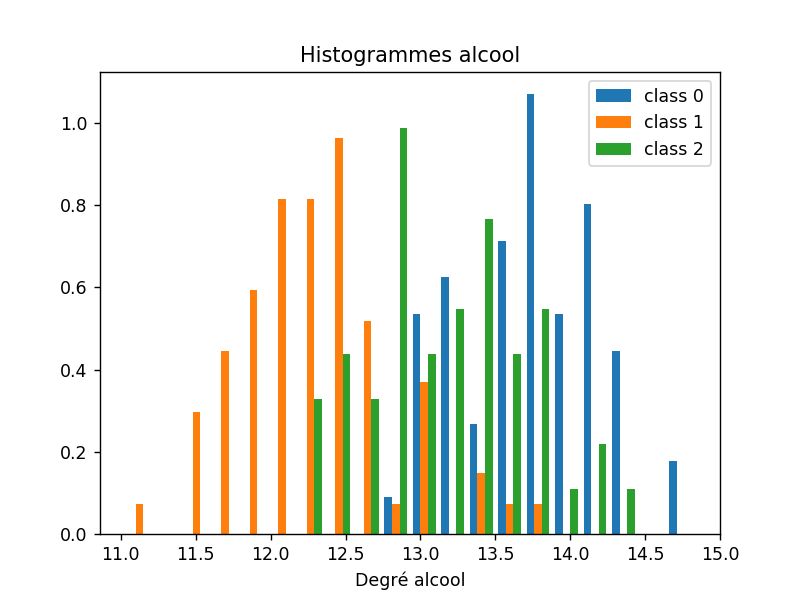

In [26]:
fig = 2
plt.figure(fig)
plt.hist((Data.loc[Data['class'] == 0]['alcohol'],
          Data.loc[Data['class'] == 1]['alcohol'],
          Data.loc[Data['class'] == 2]['alcohol']),
         normed=True, bins=20)
plt.title("Histogrammes alcool")
plt.xlabel(u"Degré alcool")
plt.legend(["class 0", "class 1", "class 2"])


(8). Calculez les fréquences de la variable **alcohol** pour les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] sachant que la variable **class** vaut 0, 1 et 2. (La notation (a,b] signifie que l'intervalle est ouvert à gauche et fermé à droite)

In [20]:
# fonction qui calcule un tableau de fréquences conditionnelles à partir d'une DataFrame
def freq_var1_by_var2(dframe, var1, by_var2):
    by_var_unique = dframe[by_var2].unique()
    distrib_by_var = dict(
        [(x, dframe.loc[dframe[by_var2] == x, [by_var2, var1]][var1].value_counts()) for x in by_var_unique])
    size_by_var = dict([(x, dframe.loc[dframe[by_var2] == x, [by_var2, var1]][var1].size) for x in by_var_unique])
    freq_by_var = dict(
        [(x, distrib_by_var[x] / size_by_var[x]) for x in by_var_unique])
    return freq_by_var

alcohol_subserie = {}
alcohol_subserie['(10.,12.5]']  = Data.loc[(Data['alcohol']>10.)&(Data['alcohol']<=12.5), ['class','alcohol']]
alcohol_subserie['(12.5,13.5]'] = Data.loc[(Data['alcohol']>12.5)&(Data['alcohol']<=13.5), ['class','alcohol']]
alcohol_subserie['(13.5,15.]']  = Data.loc[(Data['alcohol']>13.5)&(Data['alcohol']<=15), ['class','alcohol']]

alcohol_subserie_freq = dict([ (x, freq_var1_by_var2(alcohol_subserie[x], 'alcohol', 'class')) for x in alcohol_subserie.keys() ])
# pd.DataFrame(alcohol_subserie_freq['(10.,12.5]'])
alcohol_subserie_freq

{'(10.,12.5]': {1: 12.37    0.115385
  12.08    0.096154
  12.29    0.076923
  12.00    0.057692
  12.42    0.057692
  12.33    0.038462
  11.84    0.038462
  11.82    0.038462
  11.76    0.019231
  12.34    0.019231
  12.43    0.019231
  11.61    0.019231
  11.81    0.019231
  12.17    0.019231
  12.25    0.019231
  12.16    0.019231
  11.45    0.019231
  11.46    0.019231
  11.62    0.019231
  11.41    0.019231
  12.04    0.019231
  11.87    0.019231
  12.47    0.019231
  11.03    0.019231
  11.96    0.019231
  11.56    0.019231
  11.66    0.019231
  12.22    0.019231
  11.65    0.019231
  12.21    0.019231
  12.07    0.019231
  11.79    0.019231
  11.64    0.019231
  Name: alcohol, dtype: float64, 2: 12.25    0.4
  12.20    0.2
  12.45    0.2
  12.36    0.2
  Name: alcohol, dtype: float64}, '(12.5,13.5]': {0: 13.05    0.222222
  13.24    0.111111
  13.39    0.055556
  13.48    0.055556
  13.20    0.055556
  13.41    0.055556
  13.30    0.055556
  13.07    0.055556
  12.85    0.05555

 ##### Distribution jointe et statistiques de dépendance
 ---

(9). Affichez le nuage de points des variables **flavanoids** et **total_phenols** et le nuage de points des variables **flavanoids** et **nonflavanoid_phenols** sur des figures différentes (mais dans une même fenêtre). Interpretez ces deux graphiques.

<IPython.core.display.Javascript object>


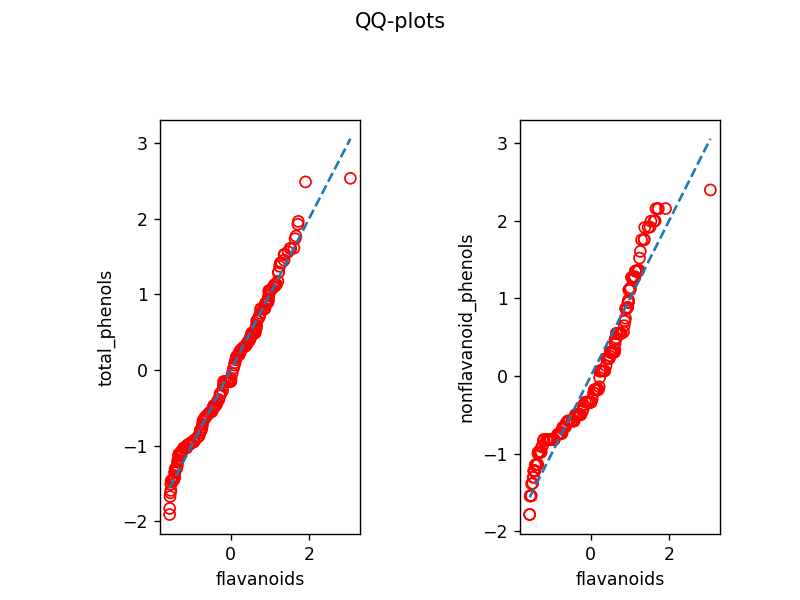

In [21]:
# réutilisation de la fonction qqplot du TD NB2_figures.ipynb
def qqplot(x, y):
    m = min([x.size,y.size])
    alpha = np.linspace(1./float(m),1.,m)
    qx = x.quantile(alpha)
    qy = y.quantile(alpha)
    plt.scatter(qx, qy, marker='o',s=40, facecolors='none', edgecolors='r')
    plt.plot(qx, qx, '--')

fig = 3
plt.figure(fig)
plt.subplot(121)
# plt.title("Histogramme alcool")
plt.suptitle('QQ-plots')
plt.xlabel(u"flavanoids")
plt.ylabel(u"total_phenols")
qqplot((Data['flavanoids']-Data['flavanoids'].mean())/Data['flavanoids'].std(),
       (Data['total_phenols']-Data['total_phenols'].mean())/Data['total_phenols'].std())
plt.subplot(122)
plt.xlabel(u"flavanoids")
plt.ylabel(u"nonflavanoid_phenols")
qqplot((Data['flavanoids']-Data['flavanoids'].mean())/Data['flavanoids'].std(),
       (Data['nonflavanoid_phenols']-Data['nonflavanoid_phenols'].mean())/Data['nonflavanoid_phenols'].std())
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)


(10). Quelle statistique utiliseriez-vous pour justifier votre réponse à la question précédente ? Justifiez votre choix et calculez la valeur de cette statistique pour les deux cas.

In [31]:
Data[['flavanoids','total_phenols']].corr()

,flavanoids,total_phenols
flavanoids,1.000000,0.864564
total_phenols,0.864564,1.000000


In [34]:
Data[['flavanoids','nonflavanoid_phenols']].corr()

,flavanoids,nonflavanoid_phenols
flavanoids,1.0000,-0.5379
nonflavanoid_phenols,-0.5379,1.0000


(11). À partir des résultats de la question 8, comment feriez-vous pour calculer la distribution jointe des variables **alcohol** et **class** ? (où les valeurs sont 0, 1 et 2 pour la variable class et les intervalles (10.,12.5], (12.5,13.5] et (13.5,15.] pour la variable alcohol) Calculez cette distribution jointe. Faites le produit entre la distribution marginale de la variable **alcohol** et celle de la variable **class**. Qu'est-ce que vous en concluez ?

(12). Ecrivez une fonction **scatter_matrix** qui trace les nuages de points de toutes les variables du tableau de données passé à la fonction en argument, où les graphiques sont organisés en forme de matrice (c'est à dire que le nuage de points des variables i et j se trouve sur la ième ligne et la jème ligne dans la fenêtre). Appliquez cette fonction à votre tableau de données et comparez votre résultat à la matrice de corrélations.

<IPython.core.display.Javascript object>


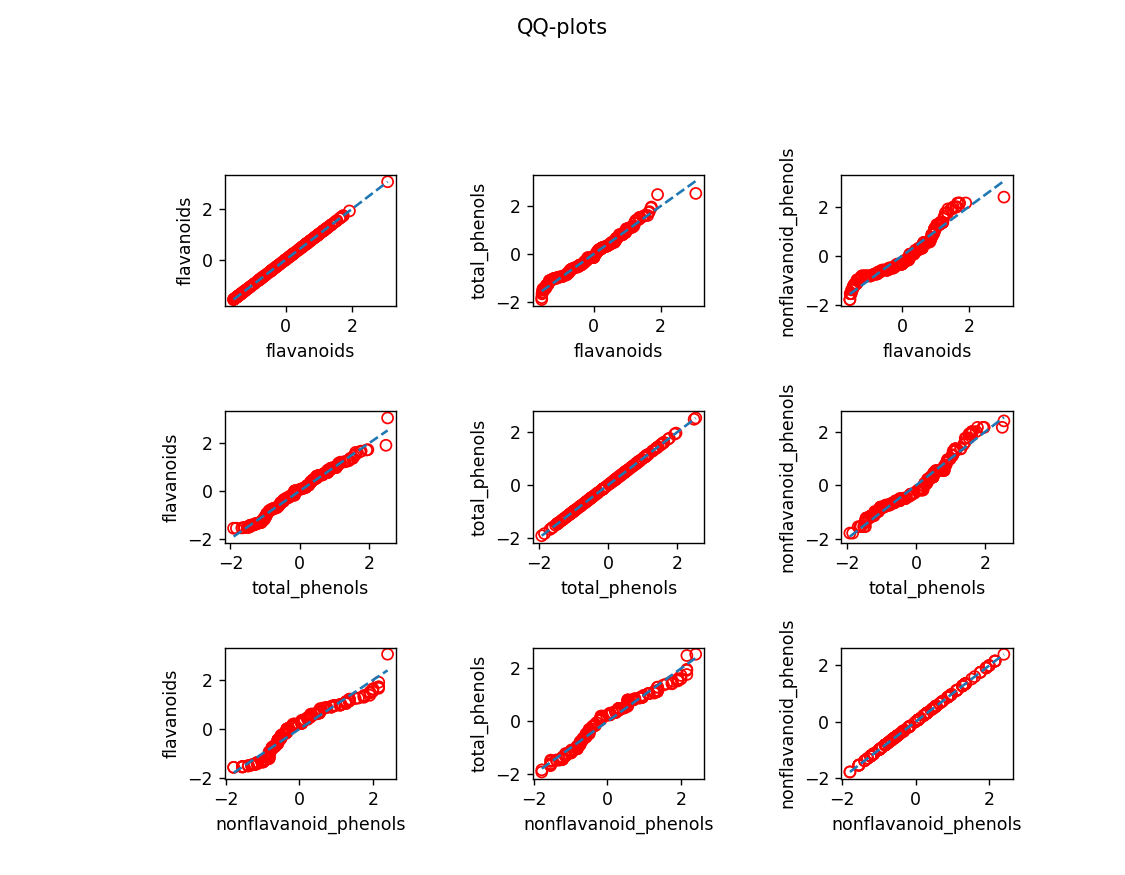

In [41]:
#  cette fonction fait appel à qqplot précédemment définie
def scatter_matrix(dframe):
    plt.figure(figsize=(9,7))
    nvar = dframe.shape[1]
    plt.suptitle('QQ-plots')
    iplot = 0
    for ix in dframe.columns.values:
        for iy in dframe.columns.values:
            iplot +=1
            plt.subplot(nvar,nvar,iplot)
            plt.xlabel(ix)
            plt.ylabel(iy)
            plt.subplots_adjust(left=0.2, hspace=0.8, wspace=0.8, top=0.8)
            qqplot((dframe[ix] - dframe[ix].mean()) / dframe[ix].std(),
                   (dframe[iy] - dframe[iy].mean()) / dframe[iy].std())
    plt.show()


scatter_matrix(Data[['flavanoids','total_phenols','nonflavanoid_phenols']])


(13). Imaginez que l'on veuille maintenant prédire la variable **class** en fonction des autres variables. Dans ce cas, quelles variables seraient utiles pour faire cette prédiction ? Justifiez votre choix.